In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#laod data & divide part

DATADIR = "C:/Users/Rdi/Desktop/data"
CATEGORIES = ["trash","bottle","can","paper"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

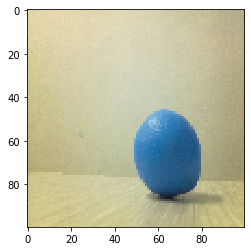

In [2]:
#show first image

IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [3]:
training_data = []

#create & resize image to training data

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num])
            
create_training_data()

In [4]:
#total data

print(len(training_data))

80


In [5]:
import random

#random data for training

random.shuffle(training_data)

In [6]:
#random result

for sample in training_data[:10]:
    print(sample[1])

2
2
3
2
2
3
1
0
0
1


In [7]:
X = []
y = []

In [8]:
#convert to numpy array and reshape

for features, label in training_data:
    X.append(features)
    y.append(label)

# 100*100 image & 3 color = RGB
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [9]:
import pickle

#data -> pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [11]:
#example numpy array

X[1]

array([[[218, 206, 157],
        [219, 205, 156],
        [223, 209, 166],
        ...,
        [170, 163, 130],
        [173, 167, 135],
        [170, 163, 134]],

       [[222, 212, 165],
        [221, 209, 161],
        [224, 211, 167],
        ...,
        [176, 171, 138],
        [175, 166, 133],
        [171, 168, 129]],

       [[223, 213, 165],
        [219, 209, 161],
        [222, 209, 163],
        ...,
        [179, 175, 137],
        [173, 169, 134],
        [176, 174, 135]],

       ...,

       [[203, 196, 139],
        [211, 203, 144],
        [208, 200, 140],
        ...,
        [196, 185, 117],
        [197, 187, 123],
        [202, 195, 122]],

       [[207, 200, 137],
        [212, 202, 141],
        [210, 203, 140],
        ...,
        [203, 194, 133],
        [198, 186, 122],
        [199, 187, 117]],

       [[209, 204, 139],
        [207, 200, 135],
        [211, 202, 135],
        ...,
        [200, 191, 124],
        [198, 188, 121],
        [198, 186, 115]]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
import pickle

In [13]:
#load data from pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

# 255=0xFF=maximum value, divide 255=use 0 to 1 represent the number
X = X/255.0

#neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3))) # 1st convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu')) # 2nd convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) #output layer


#model compile
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#model fit & epochs for 100times
model.fit(X, y, epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/100
80/80 [==============================] - 2s 26ms/sample - loss: 5.0547 - acc: 0.1500
Epoch 2/100
80/80 [==============================] - 2s 25ms/sample - loss: 4.8822 - acc: 0.3125
Epoch 3/100
80/80 [==============================] - 2s 24ms/sample - loss: 1.3487 - acc: 0.4625
Epoch 4/100
80/80 [==============================] - 2s 24ms/sample - loss: 0.8566 - acc: 0.6500
Epoch 5/100
80/80 [==============================] - 2s 23ms/sample - loss: 0.5672 - acc: 0.7375
Epoch 6/100
80/80 [==============================] - 2s 23ms/sample - loss: 0.3698 - acc: 0.8875
Epoch 7/100
80/80 [==============================] - 2s 24ms/sample - loss: 0.3010 - acc: 0.9375
Epoch 8/100
80/80 [==============================] - 2s 24ms/sample - loss: 0.2098 - acc: 0.9375
Epoch 9/100
80/80 [==================

80/80 [==============================] - 2s 27ms/sample - loss: 9.8039e-04 - acc: 1.0000
Epoch 78/100
80/80 [==============================] - 2s 27ms/sample - loss: 8.7511e-04 - acc: 1.0000
Epoch 79/100
80/80 [==============================] - 2s 25ms/sample - loss: 1.1795e-04 - acc: 1.0000
Epoch 80/100
80/80 [==============================] - 2s 26ms/sample - loss: 4.2675e-04 - acc: 1.0000
Epoch 81/100
80/80 [==============================] - 2s 25ms/sample - loss: 1.6842e-04 - acc: 1.0000
Epoch 82/100
80/80 [==============================] - 2s 25ms/sample - loss: 1.1192e-04 - acc: 1.0000
Epoch 83/100
80/80 [==============================] - 2s 25ms/sample - loss: 2.5351e-04 - acc: 1.0000
Epoch 84/100
80/80 [==============================] - 2s 25ms/sample - loss: 1.1566e-04 - acc: 1.0000
Epoch 85/100
80/80 [==============================] - 2s 24ms/sample - loss: 3.6904e-04 - acc: 1.0000
Epoch 86/100
80/80 [==============================] - 2s 24ms/sample - loss: 3.1185e-04 - acc: 

In [14]:
#save model

model.save('trash.model')

In [15]:
#print stat

test_loss, test_acc = model.evaluate(X,  y, verbose=2)

print('\nTest accuracy:', test_acc)

 - 0s - loss: 1.1526e-04 - acc: 1.0000

Test accuracy: 1.0
